In [20]:
from multiprocessing import process
import os
os.chdir('/home/yoga-peter/engdeg/Jonus')
import glob
import matplotlib.pyplot as plt
import numpy as np
from ion_channel import IonChannel
import multiprocessing

def worker(file_path, ic : IonChannel, batch_size):
    cnt = 0
    sum = 0
    file_data = []
    
    with open(file_path) as data_file:
        for record in data_file:
            if cnt < batch_size:
                record = record.strip()
                sum += float(record)
                cnt += 1
            else:
                cnt = 0
                file_data.append(sum / batch_size)
                sum = 0
    # Calculate autocorrelation
    _ = file_path.split('/')
    folder = _[-2]
    if(not os.path.exists(f"outputs2/{folder}")):
        os.mkdir(f"outputs2/{folder}")
    file_name = _[-1].split('.')[0]
    fig, ax = plt.subplots(1, 2, constrained_layout=True)
    fig.set_size_inches(12, 6)
    fig, ax[0] = ic.calculate_autocorrelation_acf(file_data[:50000], fig, ax[0], lags=100)
    fig, ax[1] = ic.calculate_autocorrelation_dfa(file_data[:50000], fig, ax[1])
    ic.save_figure(fig, folder+'/'+file_name, 'autocorrelation', False)


ic = IonChannel()
file_pattern = os.path.join("data", "normalna_aktywnosc", '-20mV', "e79.txt")
files = glob.glob(file_pattern)

batch_size = 1
stack = files
core_count = multiprocessing.cpu_count()
# Process each file
while len(stack) != 0:
    processes = []
    n = len(stack)
    print(n)
    for i in range(n if n <= core_count else core_count):
        print(i)
        processes.append(multiprocessing.Process(target=worker, args=(stack.pop(), ic, batch_size)))
        processes[i].start()
    for i in range(len(processes)):
        print(len(processes))
        processes[i].join()

1
0
1


/home/yoga-peter/engdeg/Jonus
['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '40mV', 'e41.txt']


<Figure size 640x480 with 0 Axes>

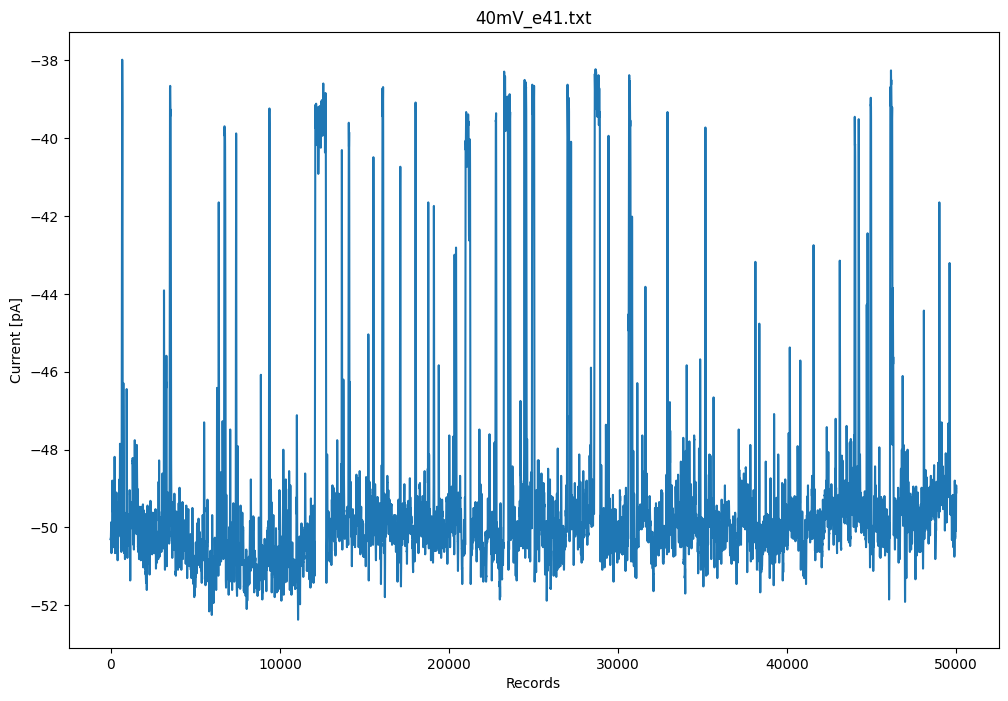

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '40mV', 'e20.txt']


<Figure size 640x480 with 0 Axes>

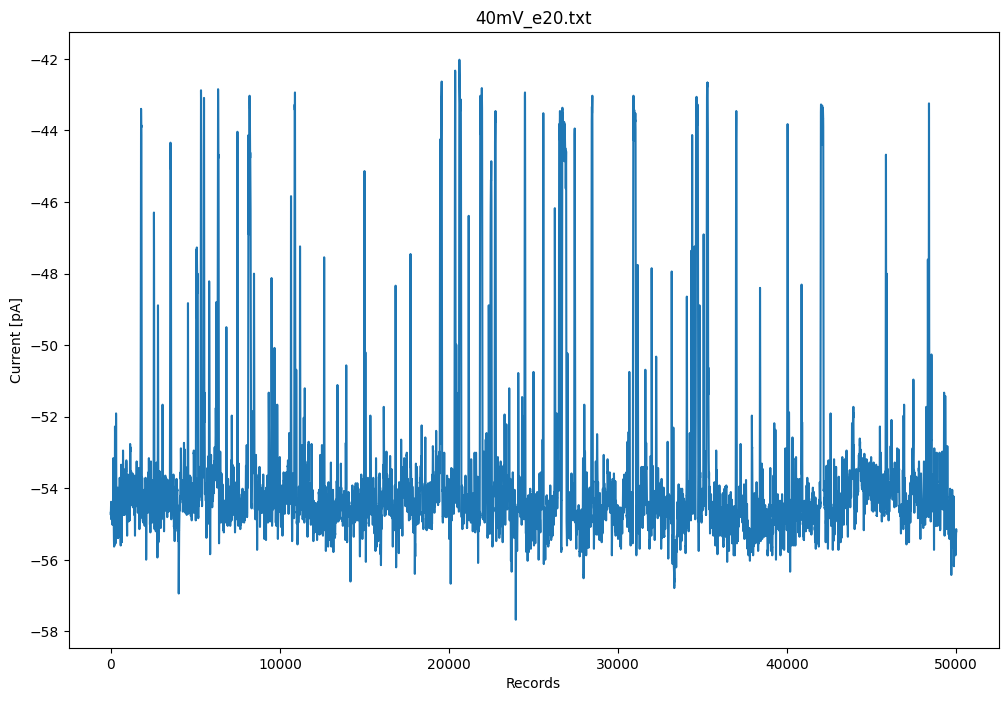

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '40mV', 'e34.txt']


<Figure size 640x480 with 0 Axes>

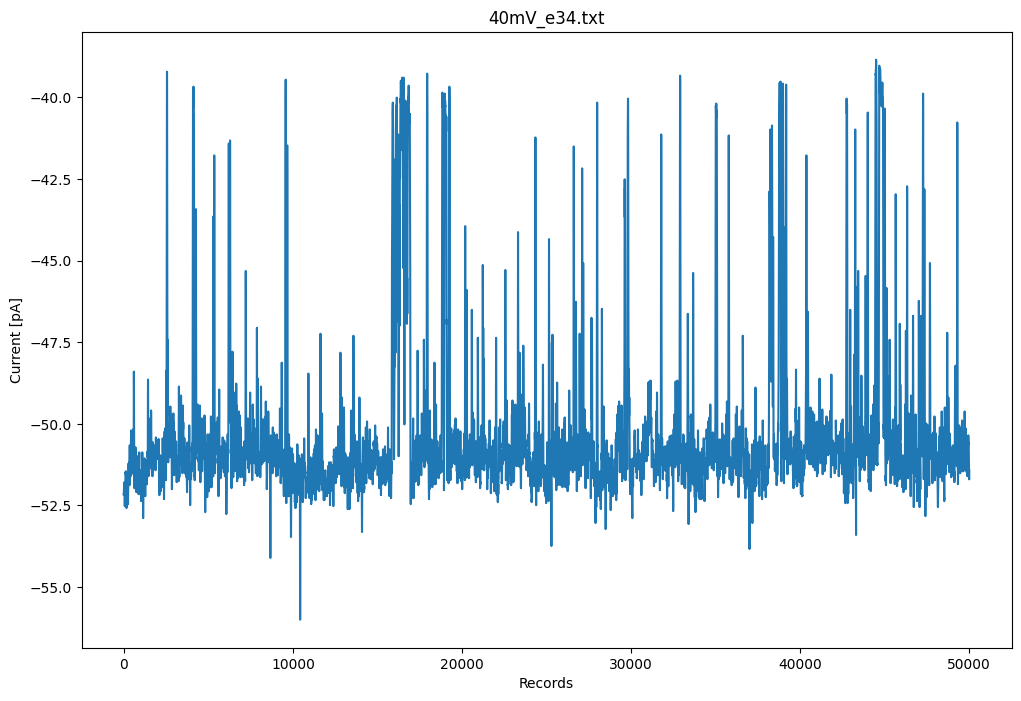

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '20mV', 'e42.txt']


<Figure size 640x480 with 0 Axes>

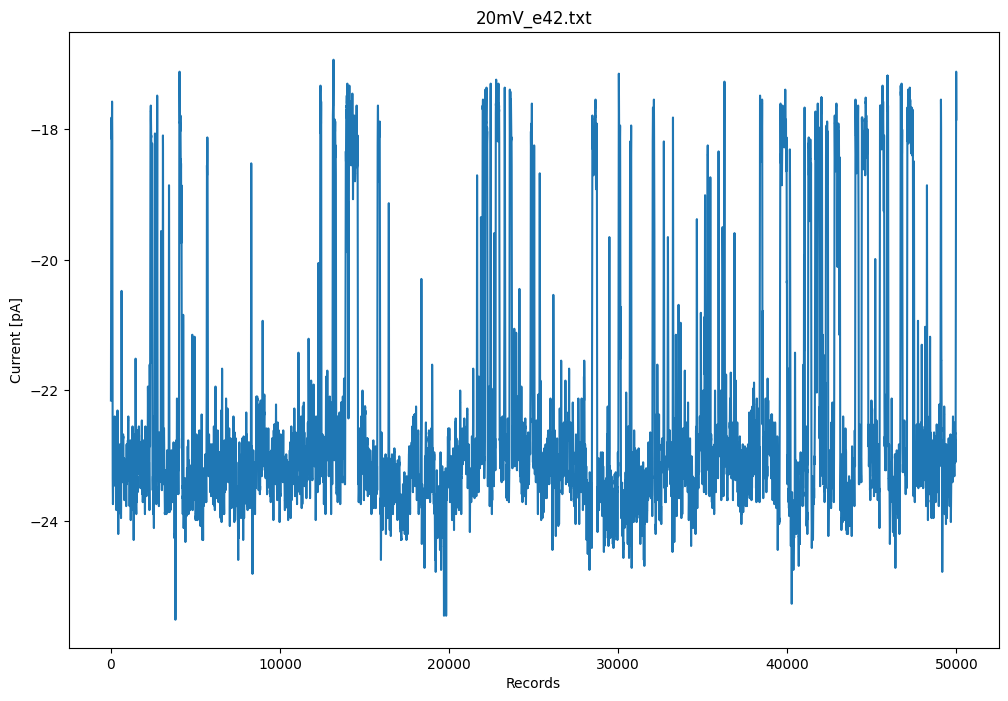

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '20mV', 'e49.txt']


<Figure size 640x480 with 0 Axes>

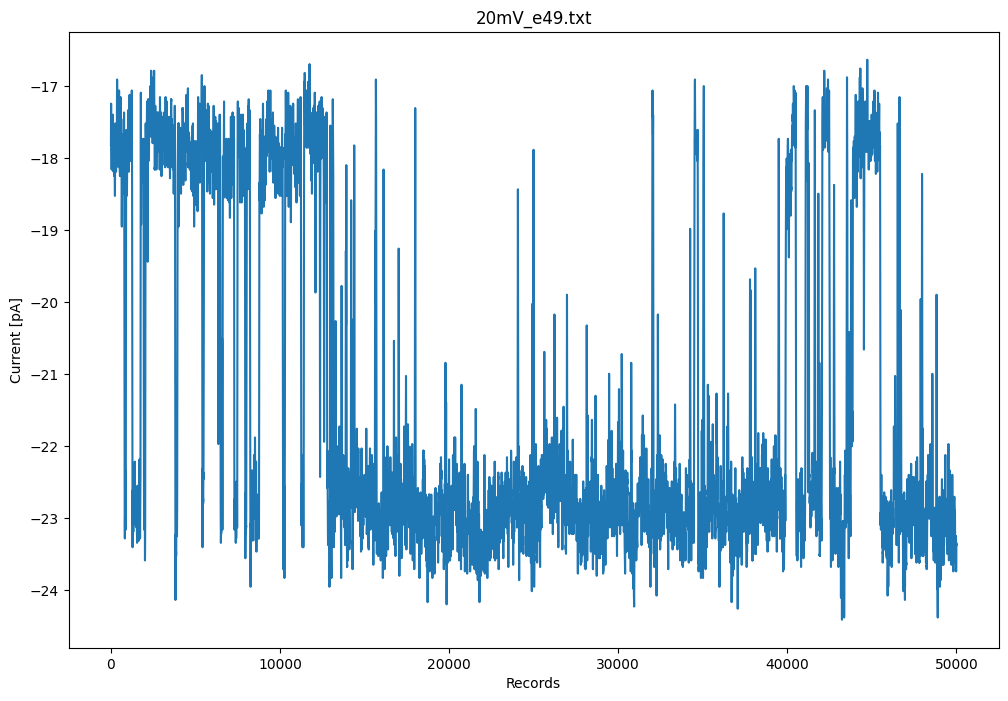

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '20mV', 'e14.txt']


<Figure size 640x480 with 0 Axes>

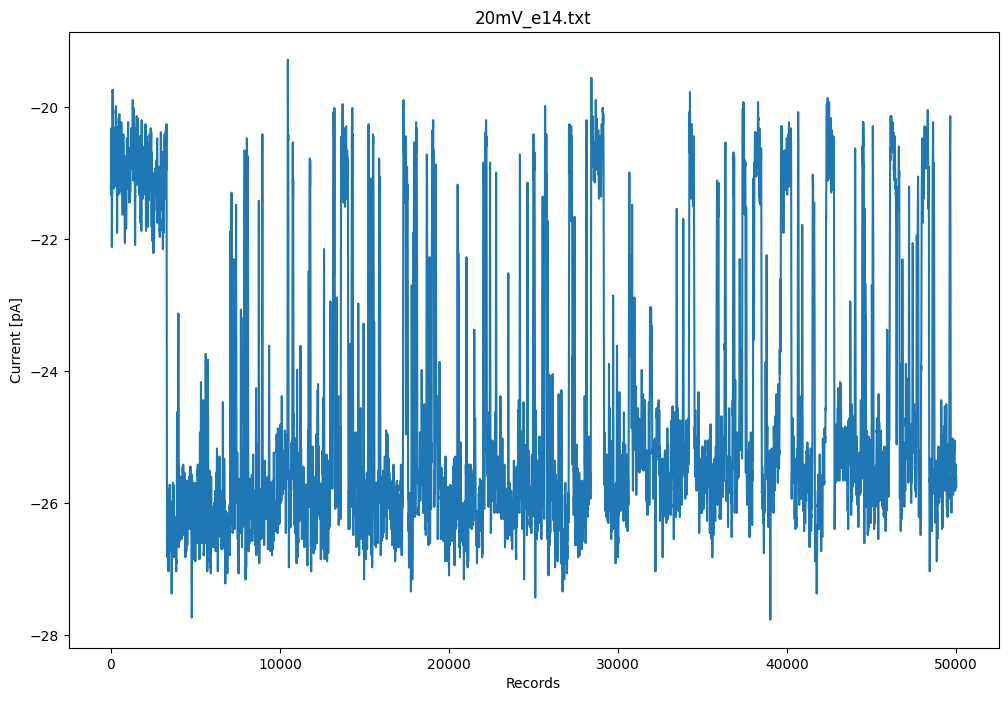

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '20mV', 'e35.txt']


<Figure size 640x480 with 0 Axes>

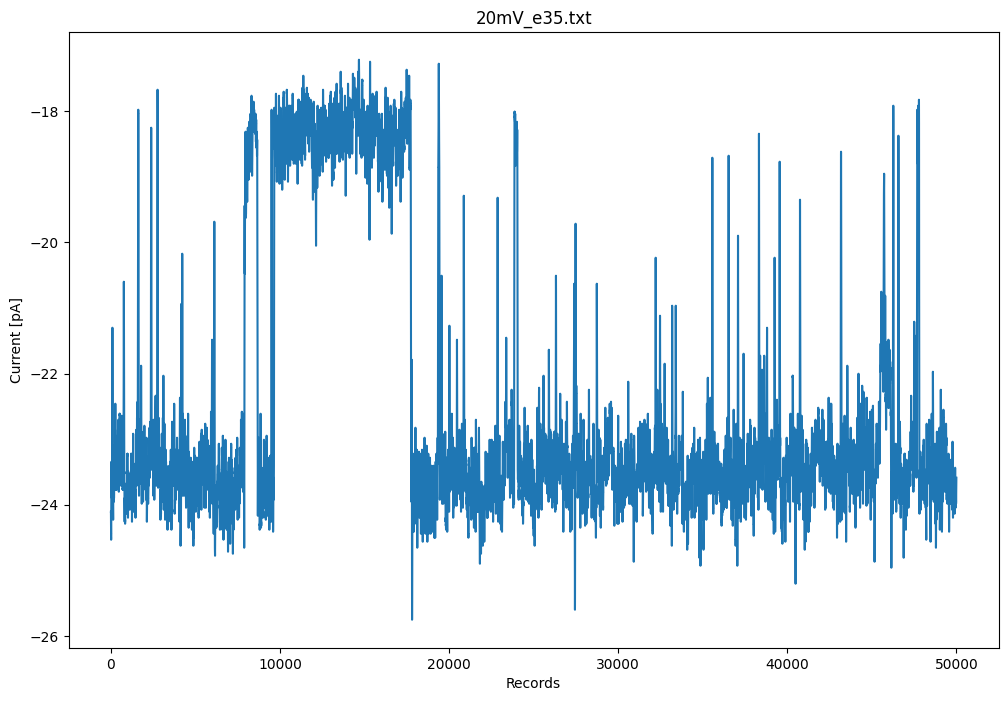

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '20mV', 'e21.txt']


<Figure size 640x480 with 0 Axes>

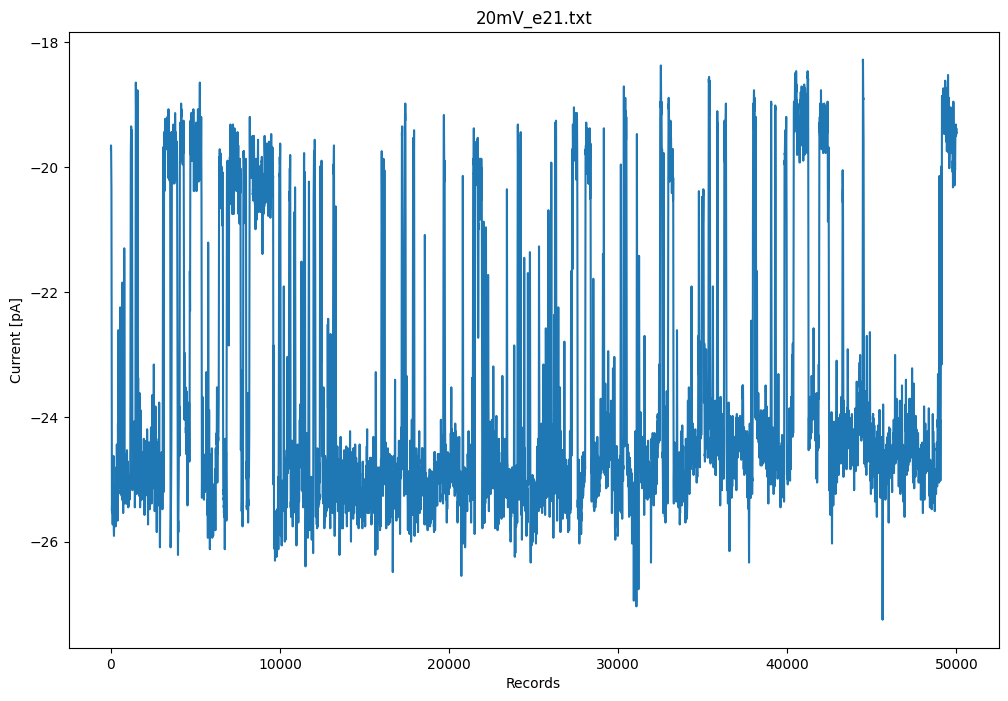

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '-20mV', 'e72.txt']


<Figure size 640x480 with 0 Axes>

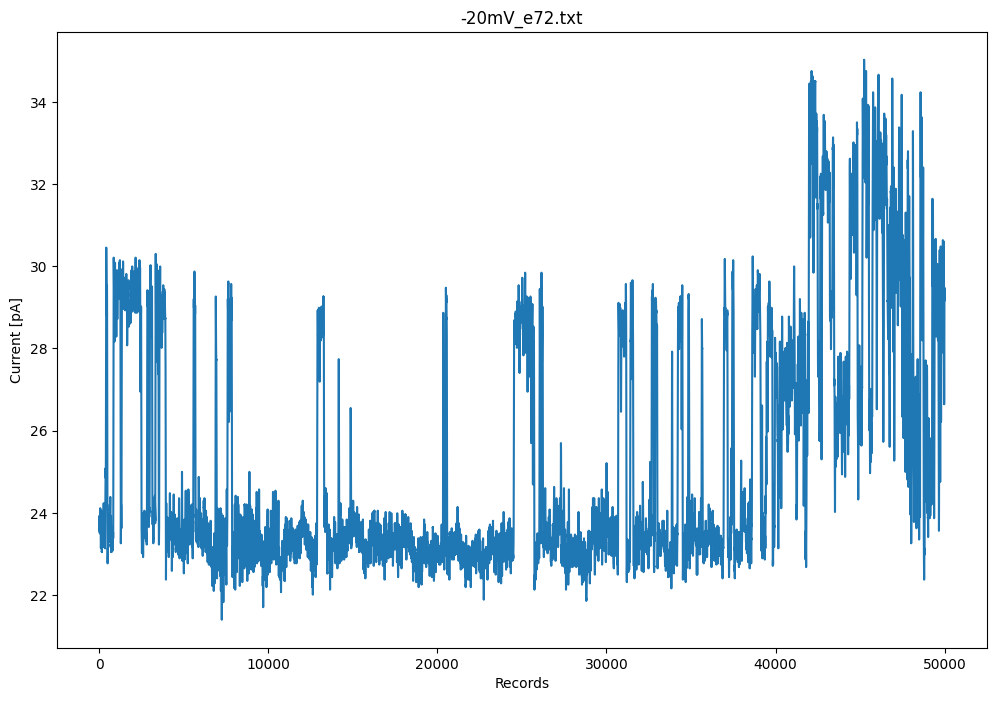

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '-20mV', 'e23.txt']


<Figure size 640x480 with 0 Axes>

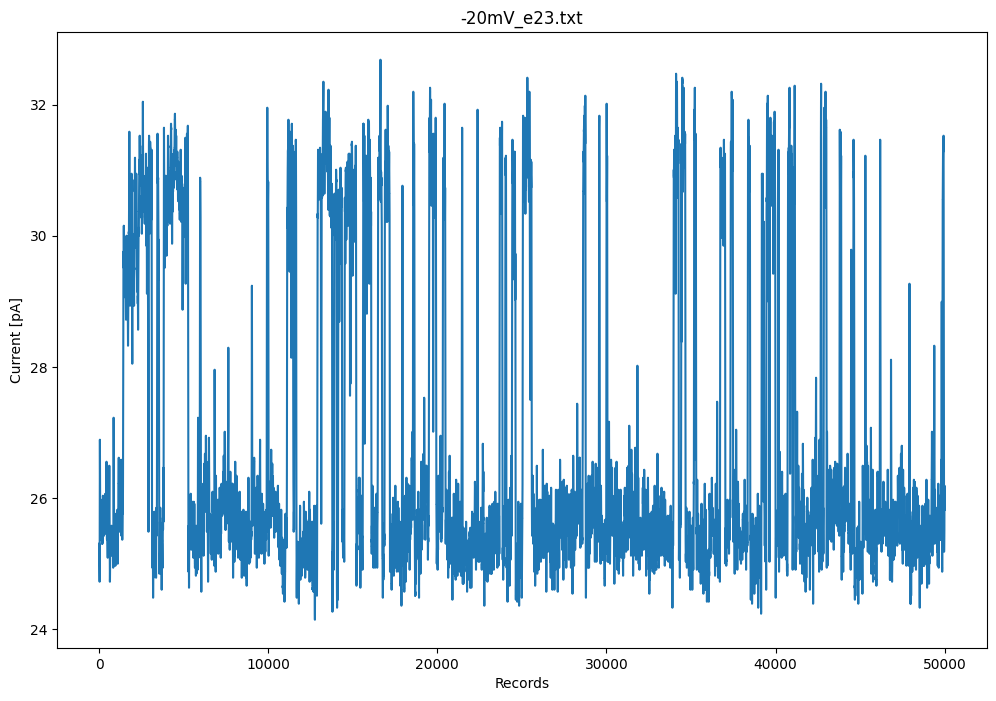

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '-20mV', 'e44.txt']


<Figure size 640x480 with 0 Axes>

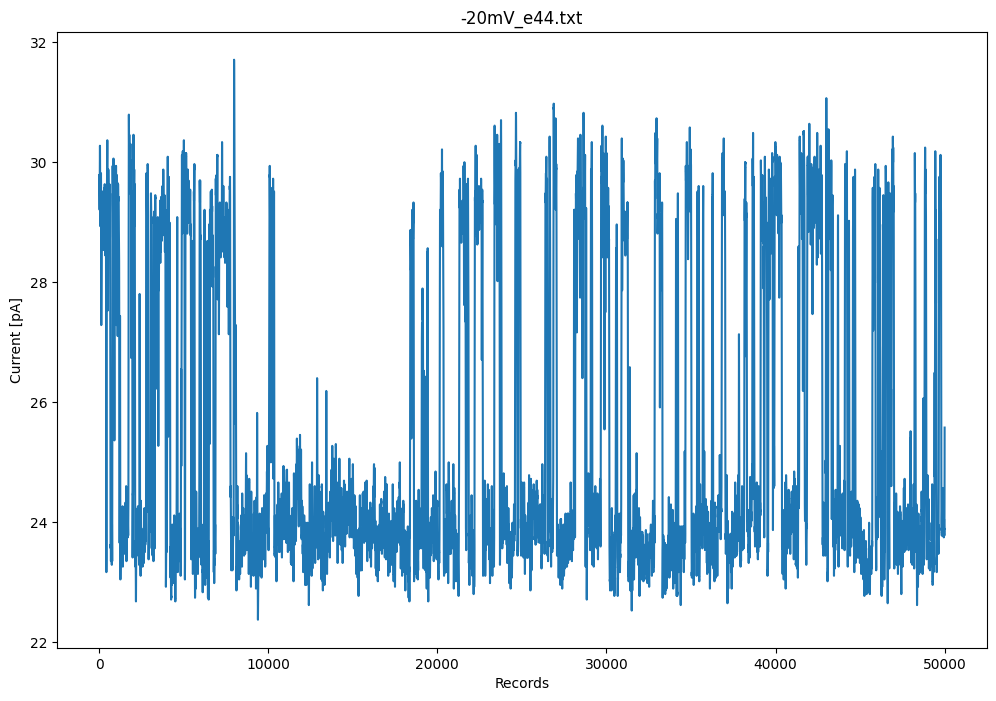

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '-20mV', 'e9.txt']


<Figure size 640x480 with 0 Axes>

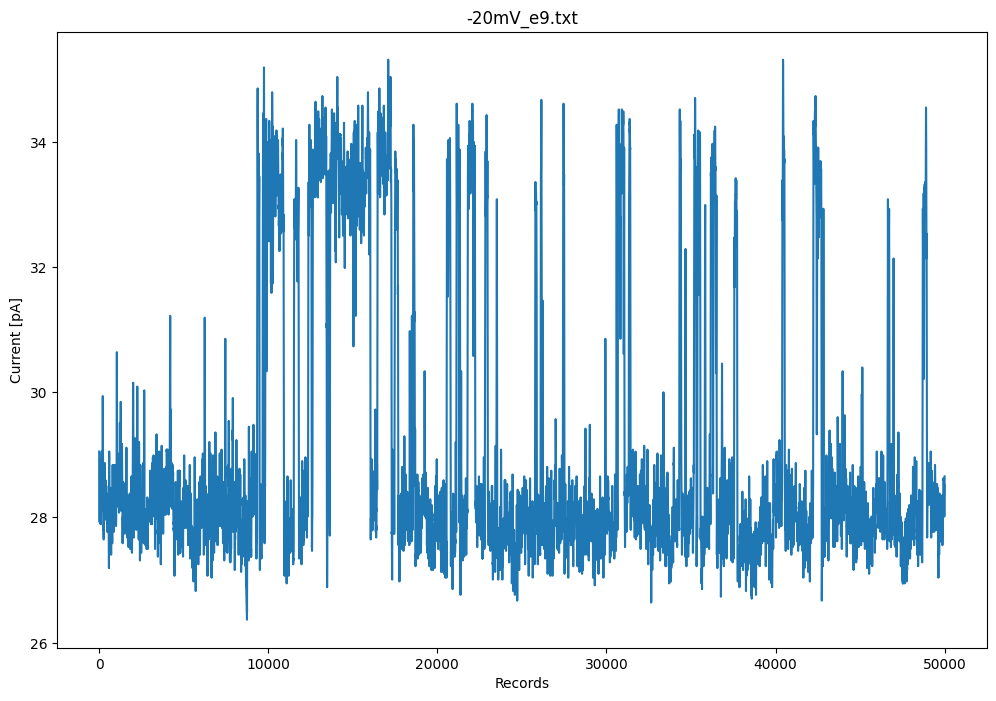

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '-20mV', 'e65.txt']


<Figure size 640x480 with 0 Axes>

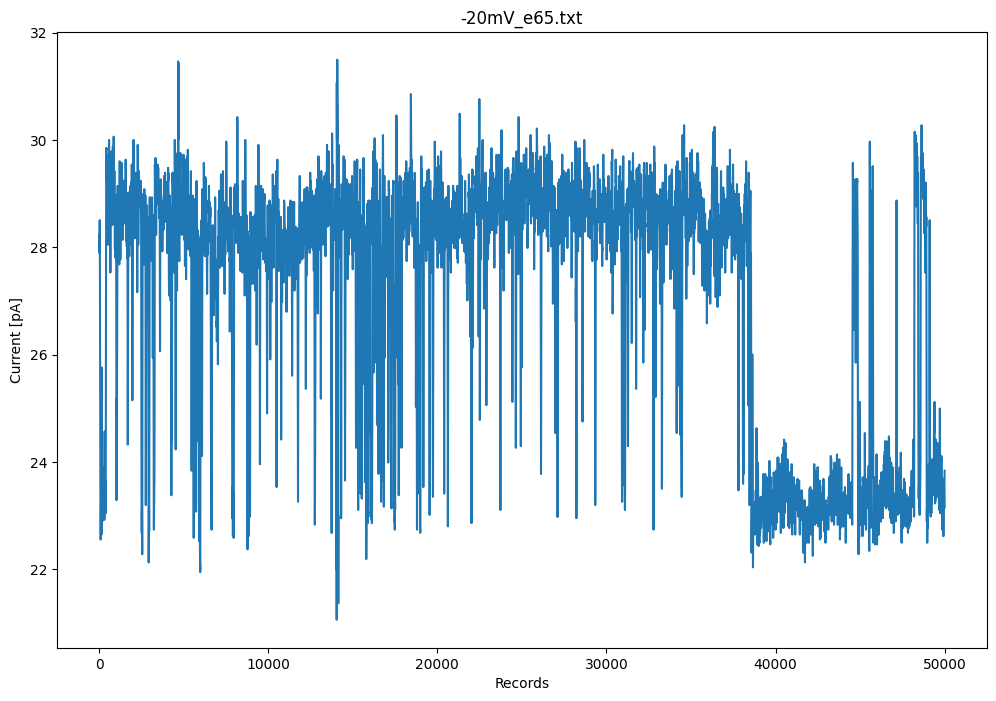

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '-20mV', 'e37.txt']


<Figure size 640x480 with 0 Axes>

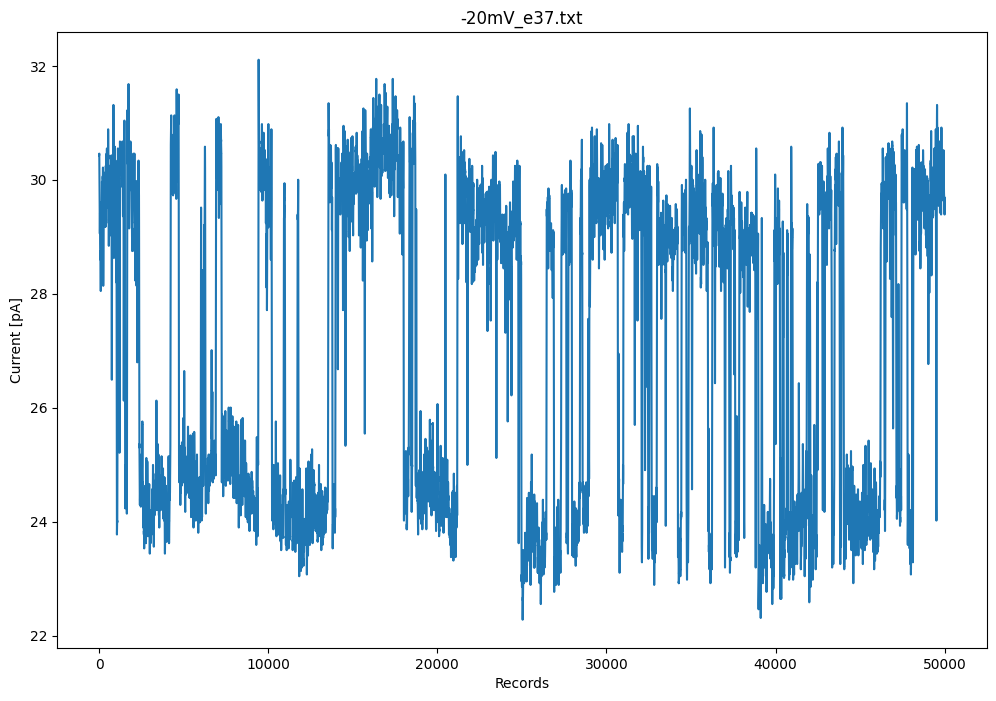

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '-20mV', 'e79.txt']


<Figure size 640x480 with 0 Axes>

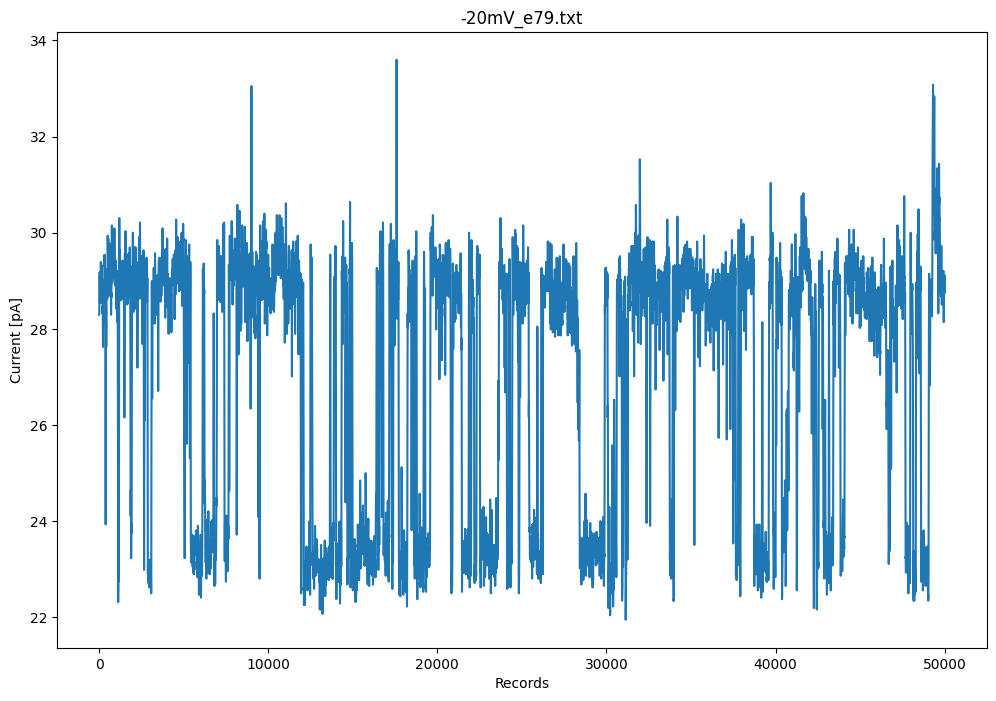

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '-60mV', 'e18.txt']


<Figure size 640x480 with 0 Axes>

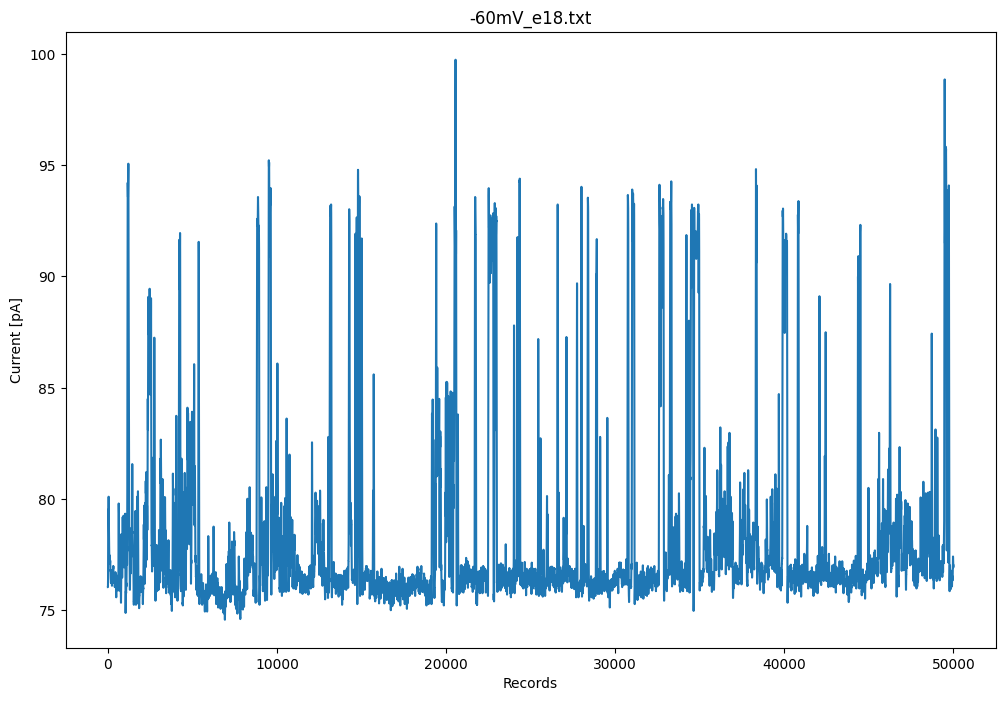

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '-60mV', 'e67.txt']


<Figure size 640x480 with 0 Axes>

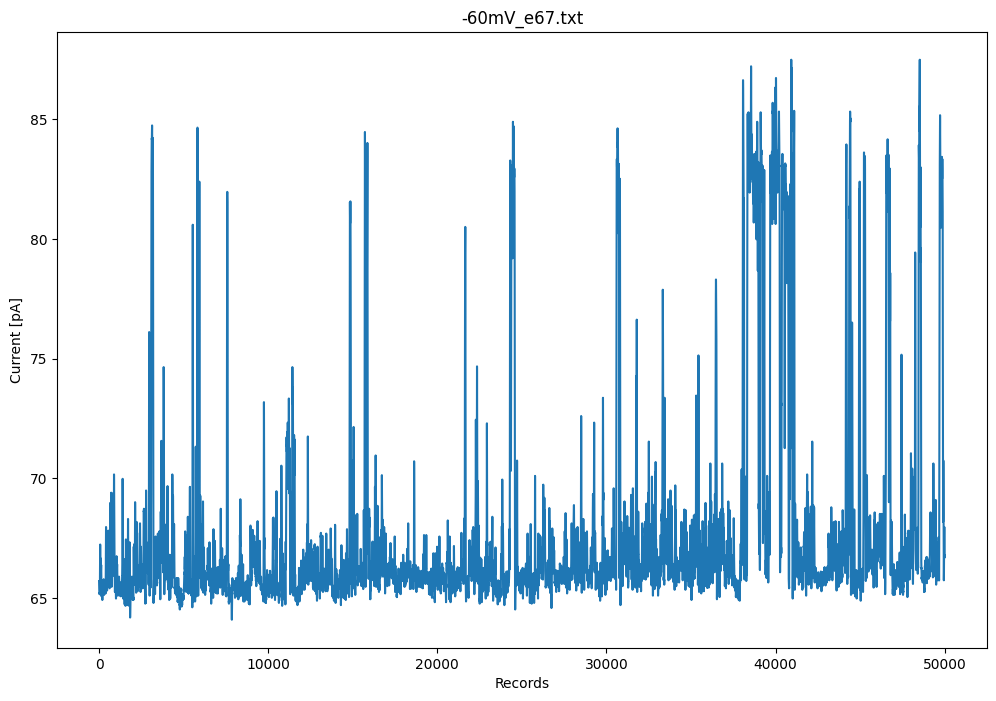

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '-60mV', 'e46.txt']


<Figure size 640x480 with 0 Axes>

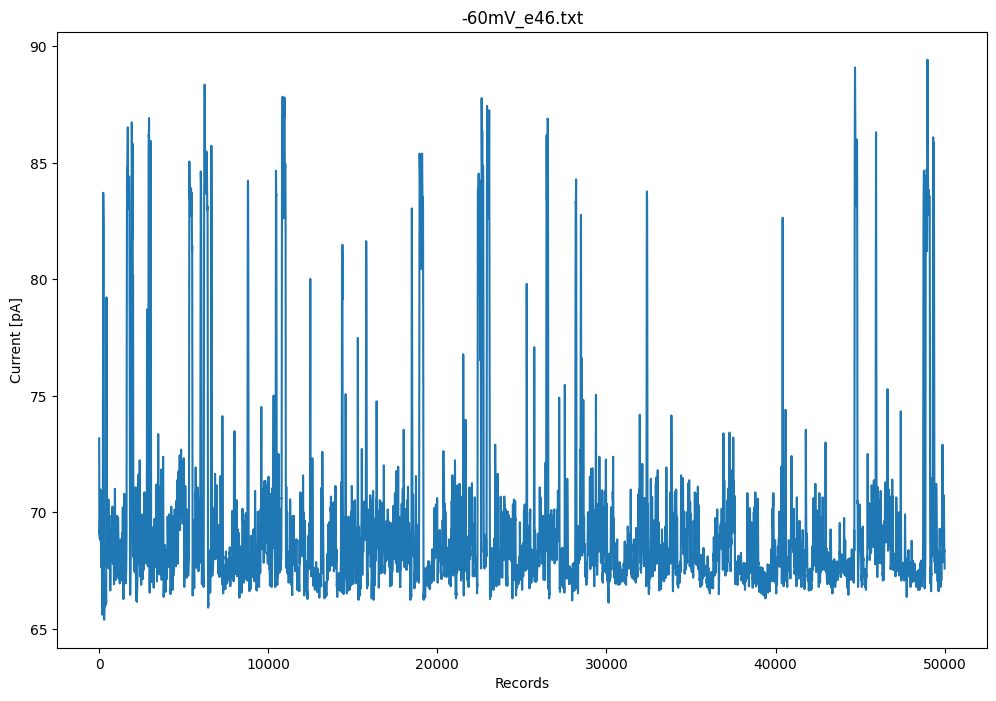

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '-60mV', 'e39.txt']


<Figure size 640x480 with 0 Axes>

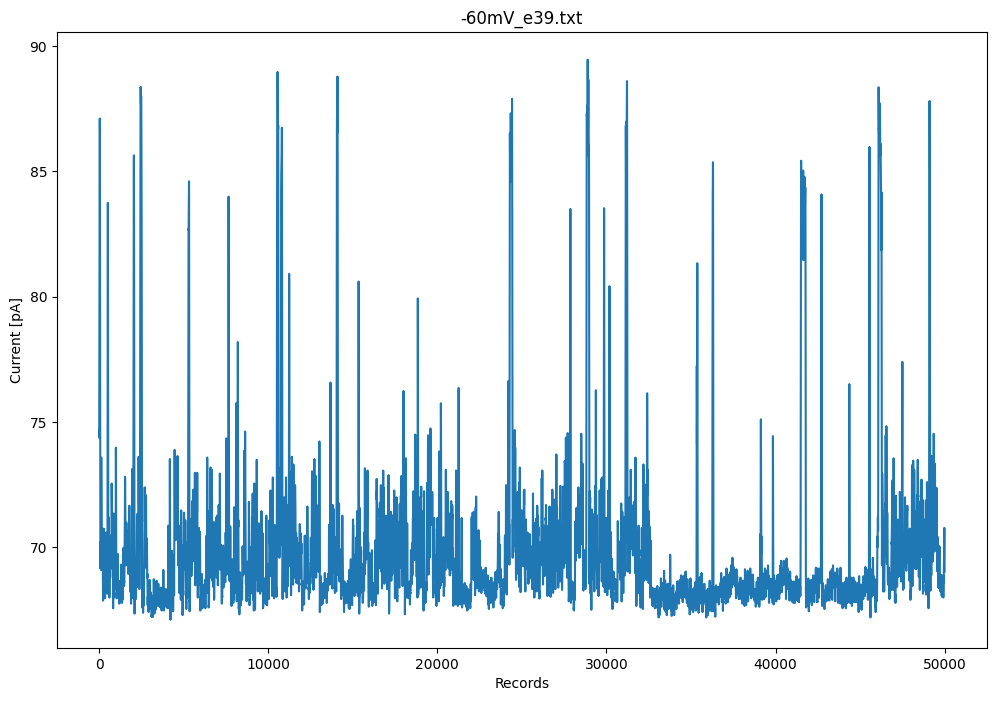

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '60mV', 'e33.txt']


<Figure size 640x480 with 0 Axes>

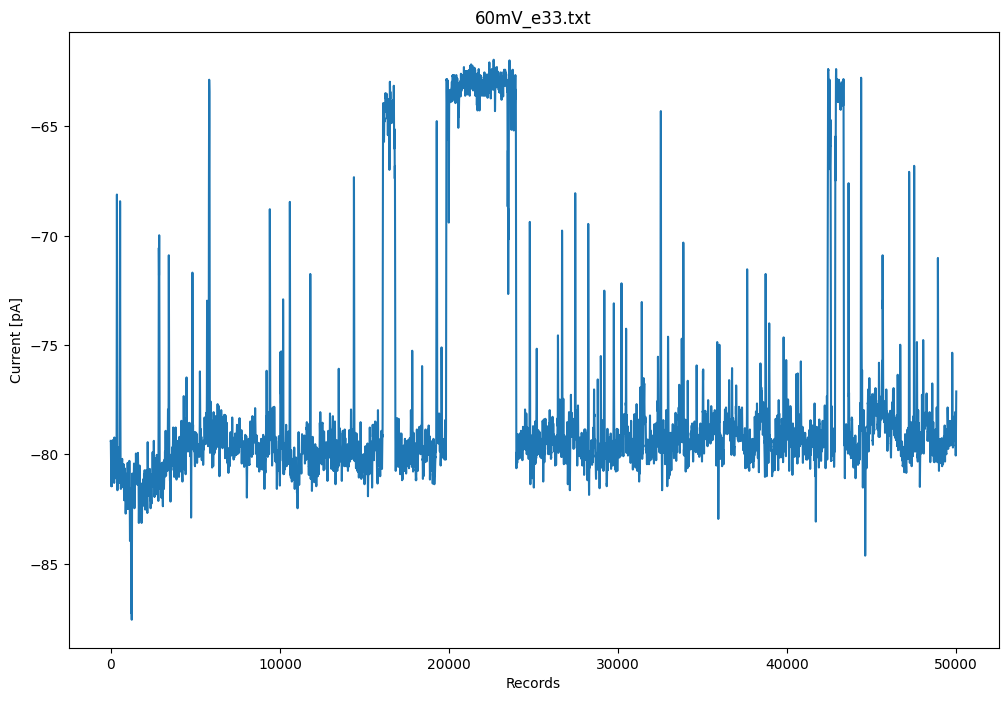

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '60mV', 'e40.txt']


<Figure size 640x480 with 0 Axes>

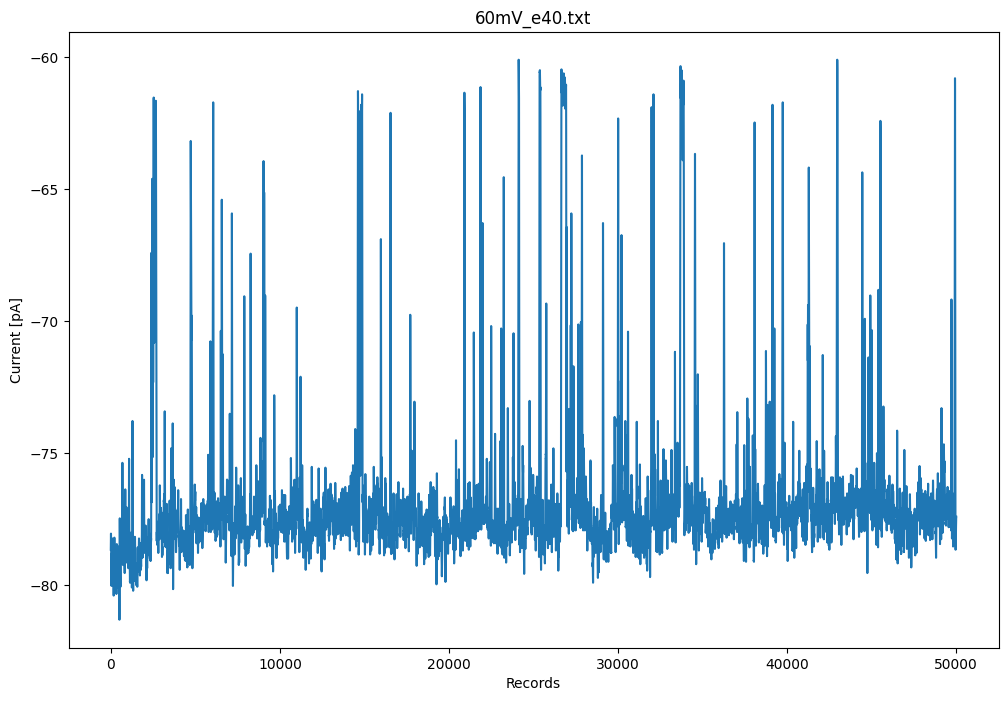

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '60mV', 'e19.txt']


<Figure size 640x480 with 0 Axes>

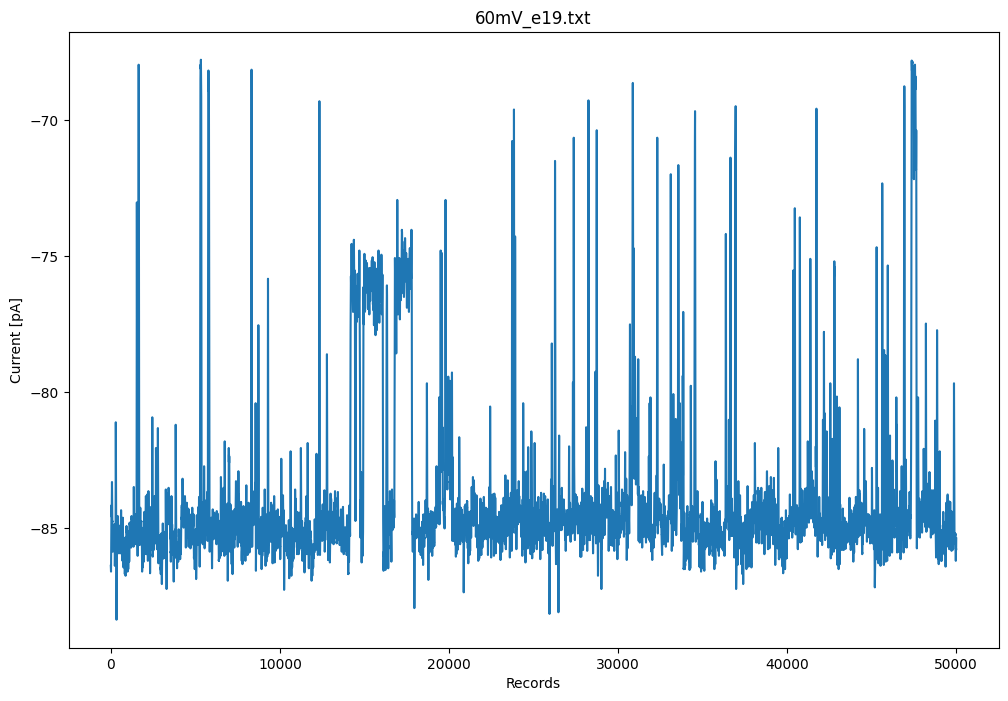

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '-40mV', 'e66.txt']


<Figure size 640x480 with 0 Axes>

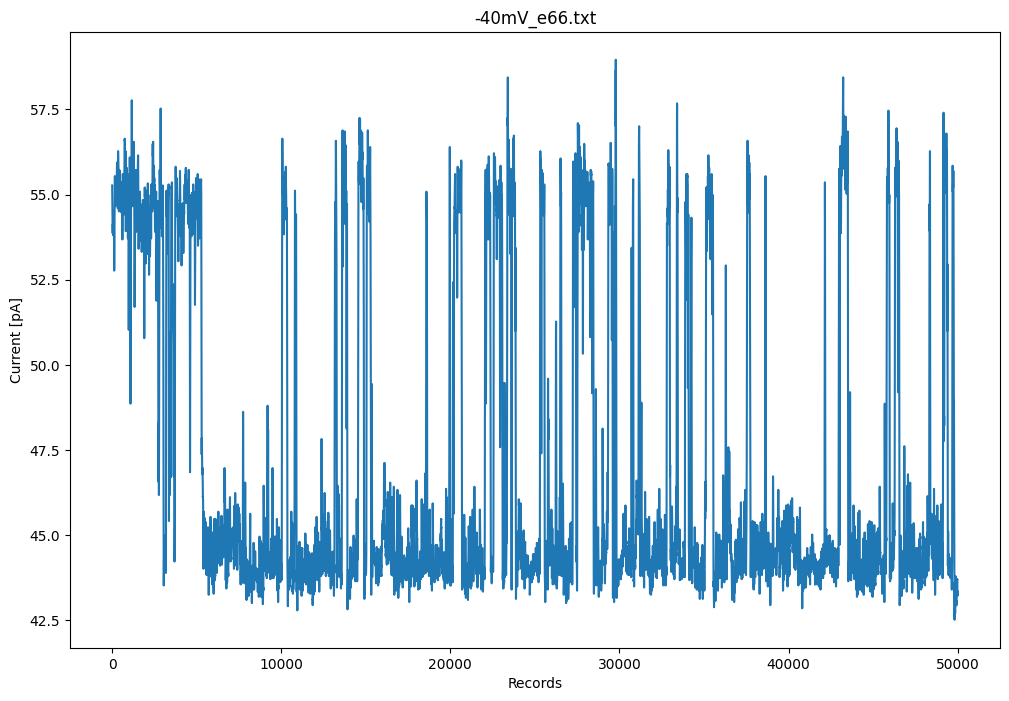

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '-40mV', 'e24.txt']


<Figure size 640x480 with 0 Axes>

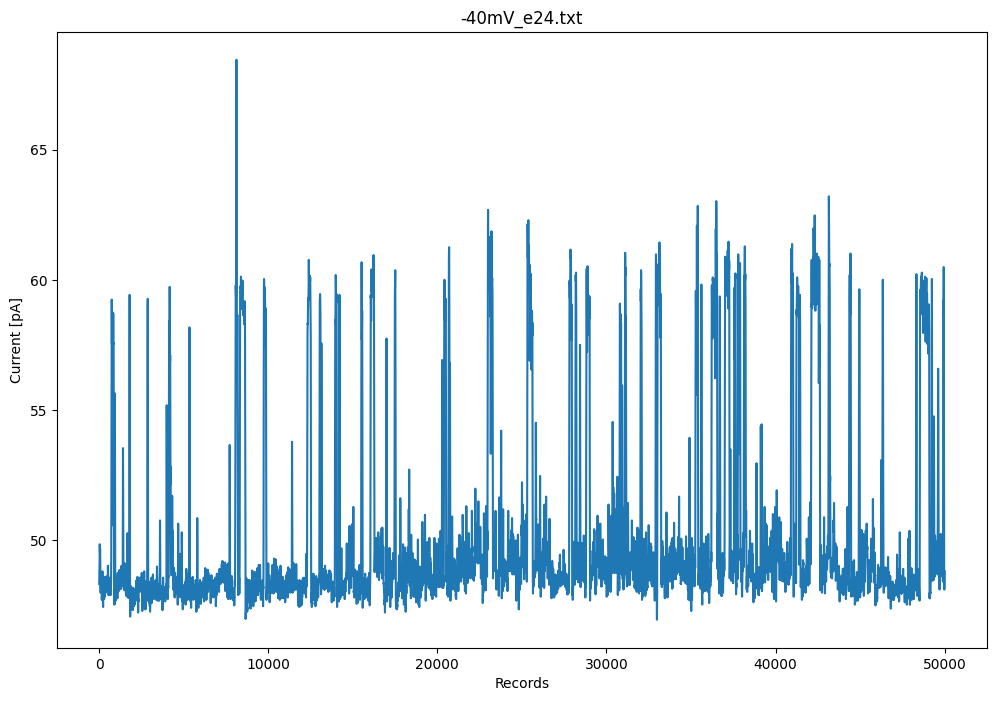

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '-40mV', 'e38.txt']


<Figure size 640x480 with 0 Axes>

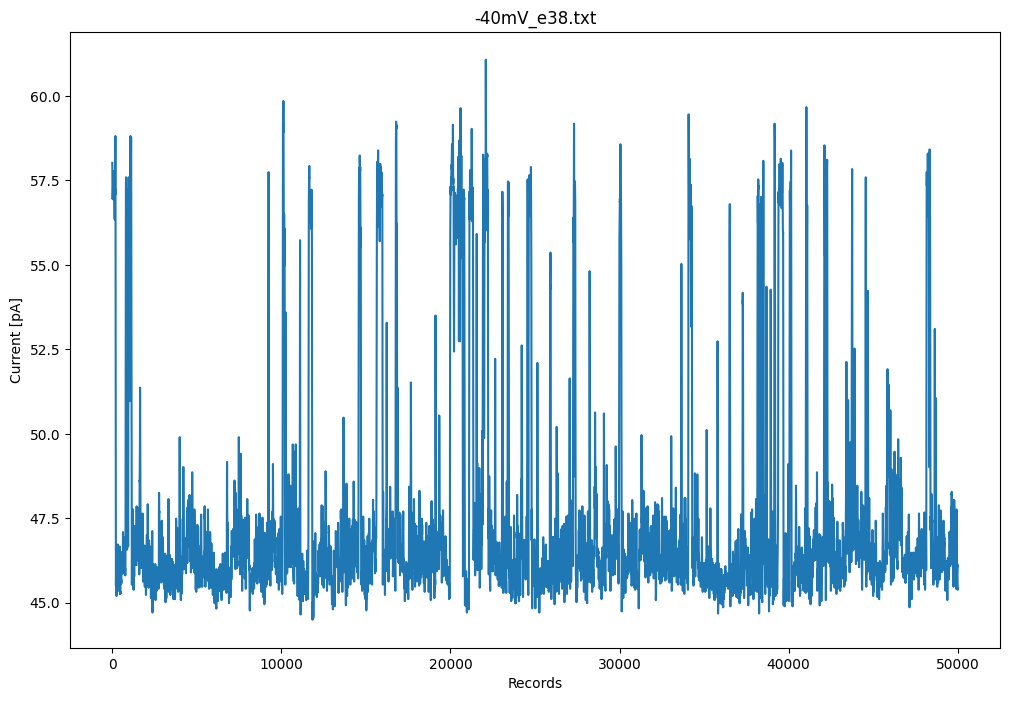

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '-40mV', 'e45.txt']


<Figure size 640x480 with 0 Axes>

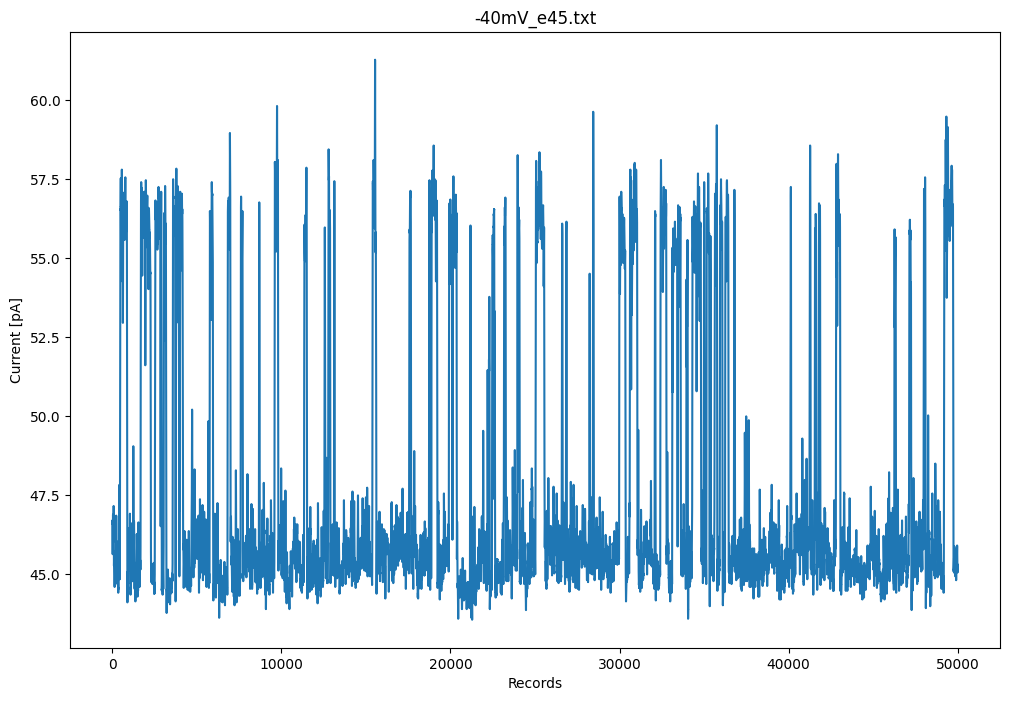

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '-40mV', 'e10.txt']


<Figure size 640x480 with 0 Axes>

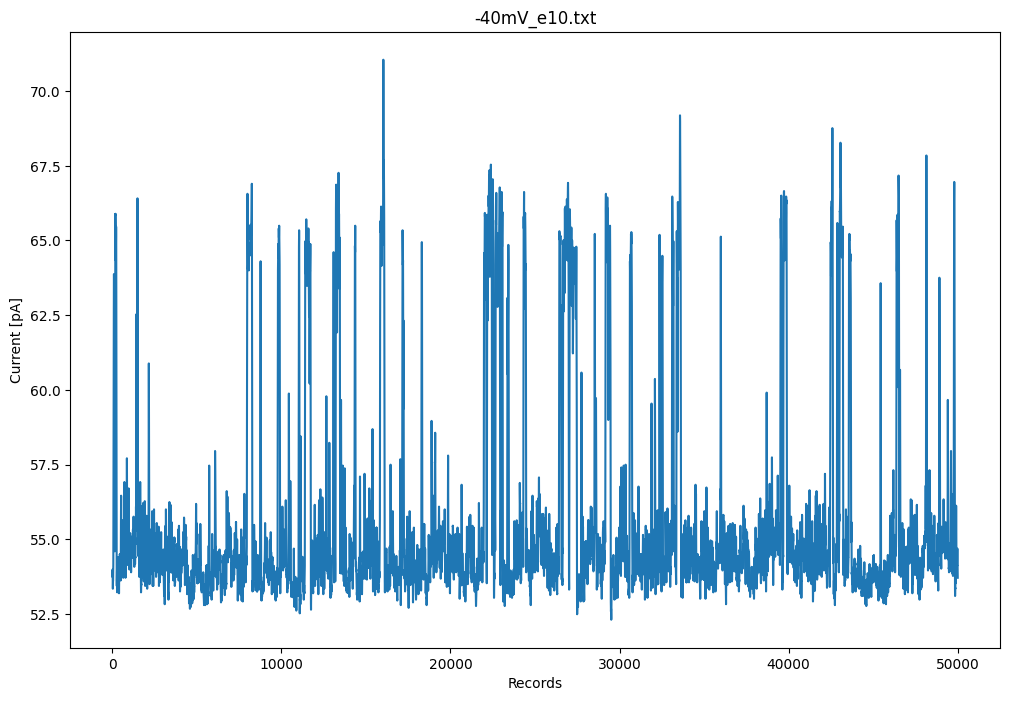

In [19]:
import os
os.chdir('/home/yoga-peter/engdeg/Jonus')
import glob
import matplotlib.pyplot as plt
# from monostable_model import calculate_autocorelation_dfa, calculate_autocorelation_acf
import numpy as np
from ion_channel import IonChannel
ic = IonChannel()
# Find all hip files in the data directory
print(os.getcwd())
file_pattern = os.path.join(os.getcwd(), "data", "normalna_aktywnosc", '*mV', "e*.txt")
files = glob.glob(file_pattern)
batch_size = 1
# Process each file
for file_path in files:
    cnt = 0
    sum = 0
    file_data = []
    
    with open(file_path) as data_file:
        for record in data_file:
            if cnt < batch_size:
                record = record.strip()
                sum += float(record)
                cnt += 1
            else:
                cnt = 0
                file_data.append(sum / batch_size)
                sum = 0
    
    # Calculate autocorrelation
    _ = file_path.split('/')
    print(_)
    file_name = _[-2] + '_' + _[-1]
    plt.clf()  
    plt.figure(figsize=(12,8))
    plt.title(file_name)
    plt.plot(file_data[:50000])
    # plt.vlines(x=self.breakpoints, ymin=np.min(self.data_transposed[1]), ymax=np.max(self.data_transposed[1]), color='red', linestyle='--')
    plt.xlabel("Records")
    plt.ylabel("Current [pA]")

    save_dir = os.path.join(os.getcwd(), 'miscellaneous', 'experimental_time_series')
    if not os.path.exists(save_dir):
        os.mkdir(save_dir)
    plt.savefig(os.path.join(save_dir, file_name + '.png'))
    plt.show()